In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# dtypes in Excel is preserved

df1 = pd.read_excel('Consumer_Complaints.xlsx')


# df = pd.read_csv('Consumer_Complaints.csv')

In [3]:
df1.head(2)

,Complaint ID,Submitted via,Date submitted,Date received,State,Product,Sub-product,Issue,Sub-issue,Company public response,Company response to consumer,Timely response?
0,4848023,Referral,2021-10-24,2021-10-27,NY,Mortgage,Conventional home mortgage,Applying for a mortgage or refinancing an exis...,NaN,Company has responded to the consumer and the ...,Closed with explanation,Yes
1,3621464,Web,2020-04-24,2020-04-24,FL,"Money transfer, virtual currency, or money ser...",Refund anticipation check,Lost or stolen check,NaN,Company has responded to the consumer and the ...,Closed with monetary relief,Yes


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62516 entries, 0 to 62515
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Complaint ID                  62516 non-null  int64         
 1   Submitted via                 62516 non-null  object        
 2   Date submitted                62516 non-null  datetime64[ns]
 3   Date received                 62516 non-null  datetime64[ns]
 4   State                         62516 non-null  object        
 5   Product                       62516 non-null  object        
 6   Sub-product                   62509 non-null  object        
 7   Issue                         62516 non-null  object        
 8   Sub-issue                     51658 non-null  object        
 9   Company public response       60341 non-null  object        
 10  Company response to consumer  62516 non-null  object        
 11  Timely response?            

Data dictionary

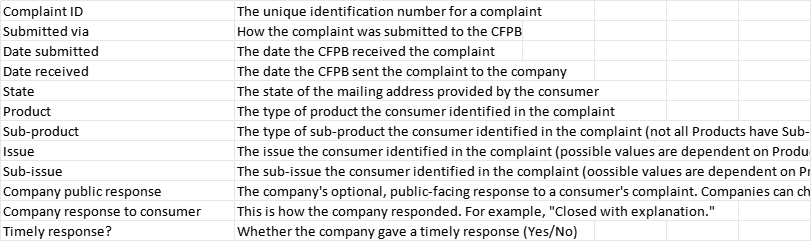

Tasks:
- Complainnts by date received
- Channel of complaint
- Breakdown of Complaints by products, Issue
- Whether company has responded or not

### EDA: Data cleaning

In [5]:
# check missing values

df1.isna().sum()

Complaint ID                        0
Submitted via                       0
Date submitted                      0
Date received                       0
State                               0
Product                             0
Sub-product                         7
Issue                               0
Sub-issue                       10858
Company public response          2175
Company response to consumer        0
Timely response?                 1494
dtype: int64

In [152]:
# Create data copy

data = df1.copy()

In [7]:
# drop column and rows with missing values

data = data.drop('Sub-issue', axis=1)

In [8]:


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62516 entries, 0 to 62515
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Complaint ID                  62516 non-null  int64         
 1   Submitted via                 62516 non-null  object        
 2   Date submitted                62516 non-null  datetime64[ns]
 3   Date received                 62516 non-null  datetime64[ns]
 4   State                         62516 non-null  object        
 5   Product                       62516 non-null  object        
 6   Sub-product                   62509 non-null  object        
 7   Issue                         62516 non-null  object        
 8   Company public response       60341 non-null  object        
 9   Company response to consumer  62516 non-null  object        
 10  Timely response?              61022 non-null  object        
dtypes: datetime64[ns](2), int64(

In [9]:
# check duplicated values

data.duplicated().sum()

0

In [10]:
# drop missing values across rows

# Specifying inplace=True helps to not re-assign the dataframe (e.g: data = data.dropna(axis=0, inplace=True))
data.dropna(axis=0, inplace=True)



# data = data.dropna(axis=0)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60334 entries, 0 to 62515
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Complaint ID                  60334 non-null  int64         
 1   Submitted via                 60334 non-null  object        
 2   Date submitted                60334 non-null  datetime64[ns]
 3   Date received                 60334 non-null  datetime64[ns]
 4   State                         60334 non-null  object        
 5   Product                       60334 non-null  object        
 6   Sub-product                   60334 non-null  object        
 7   Issue                         60334 non-null  object        
 8   Company public response       60334 non-null  object        
 9   Company response to consumer  60334 non-null  object        
 10  Timely response?              60334 non-null  object        
dtypes: datetime64[ns](2), int64(1), o

In [12]:
# check missing values

data.isna().sum()

Complaint ID                    0
Submitted via                   0
Date submitted                  0
Date received                   0
State                           0
Product                         0
Sub-product                     0
Issue                           0
Company public response         0
Company response to consumer    0
Timely response?                0
dtype: int64

### EDA 2

## Tasks:
- Complaints by date submitted
- Channel of complaint
- Breakdown of Complaints by products, Issue
- Whether company has responded or not

In [13]:
print(data['Issue'].nunique())

print(data['Date submitted'].nunique())

76
2303


## Task 1: Complaints by date submitted

In [14]:
# check for earliest recorded complaint

data.sort_values('Date submitted').head()

,Complaint ID,Submitted via,Date submitted,Date received,State,Product,Sub-product,Issue,Company public response,Company response to consumer,Timely response?
51422,2471723,Web,2017-05-01,2017-05-03,CA,Mortgage,Conventional home mortgage,Struggling to pay mortgage,Company has responded to the consumer and the ...,Closed with explanation,Yes
36562,2471751,Web,2017-05-01,2017-05-03,MA,Checking or savings account,Checking account,Managing an account,Company has responded to the consumer and the ...,Closed with monetary relief,Yes
60874,2540884,Referral,2017-05-01,2017-07-18,SC,Credit card or prepaid card,General-purpose credit card or charge card,Getting a credit card,Company has responded to the consumer and the ...,Closed with explanation,Yes
29921,2473990,Web,2017-05-01,2017-05-03,NC,"Credit reporting, credit repair services, or o...",Other personal consumer report,Problem with a company's investigation into an...,Company has responded to the consumer and the ...,Closed with explanation,Yes
53913,2471690,Web,2017-05-01,2017-05-01,DC,Mortgage,Conventional home mortgage,Closing on a mortgage,Company has responded to the consumer and the ...,Closed with explanation,Yes


In [15]:
# Check for latest recorded complaint

data.sort_values('Date submitted').tail()

,Complaint ID,Submitted via,Date submitted,Date received,State,Product,Sub-product,Issue,Company public response,Company response to consumer,Timely response?
2631,7426712,Web,2023-08-19,2023-08-19,TX,Checking or savings account,Checking account,Managing an account,Company has responded to the consumer and the ...,Closed with explanation,Yes
22788,7429573,Web,2023-08-20,2023-08-20,IL,Credit card or prepaid card,General-purpose credit card or charge card,Getting a credit card,Company has responded to the consumer and the ...,Closed with non-monetary relief,Yes
29126,7433235,Web,2023-08-22,2023-08-22,MO,Checking or savings account,Checking account,Opening an account,Company has responded to the consumer and the ...,Closed with explanation,Yes
12448,7447881,Web,2023-08-23,2023-08-23,NY,Credit card or prepaid card,General-purpose credit card or charge card,Getting a credit card,Company has responded to the consumer and the ...,Closed with non-monetary relief,Yes
30295,7443444,Web,2023-08-23,2023-08-23,NJ,Checking or savings account,Checking account,Closing an account,Company has responded to the consumer and the ...,Closed with explanation,Yes


In [16]:

# Extract year value from datetime column

data['complaint_year'] = data['Date submitted'].dt.year
data

,Complaint ID,Submitted via,Date submitted,Date received,State,Product,Sub-product,Issue,Company public response,Company response to consumer,Timely response?,complaint_year
0,4848023,Referral,2021-10-24,2021-10-27,NY,Mortgage,Conventional home mortgage,Applying for a mortgage or refinancing an exis...,Company has responded to the consumer and the ...,Closed with explanation,Yes,2021
1,3621464,Web,2020-04-24,2020-04-24,FL,"Money transfer, virtual currency, or money ser...",Refund anticipation check,Lost or stolen check,Company has responded to the consumer and the ...,Closed with monetary relief,Yes,2020
2,5818349,Web,2022-07-27,2022-07-27,CA,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Company has responded to the consumer and the ...,Closed with explanation,Yes,2022
4,5820224,Referral,2022-07-27,2022-07-28,VA,Credit card or prepaid card,General-purpose credit card or charge card,Closing your account,Company has responded to the consumer and the ...,Closed with explanation,Yes,2022
5,6237961,Web,2022-11-23,2022-11-23,CA,Credit card or prepaid card,General-purpose credit card or charge card,Getting a credit card,Company has responded to the consumer and the ...,Closed with explanation,Yes,2022
...,...,...,...,...,...,...,...,...,...,...,...,...
62511,2501211,Web,2017-06-04,2017-06-04,TX,Checking or savings account,Checking account,Managing an account,Company has responded to the consumer and the ...,Closed with explanation,Yes,2017
62512,2472406,Referral,2017-05-01,2017-05-05,VA,Checking or savings account,Other banking product or service,Problem caused by your funds being low,Company has responded to the consumer and the ...,Closed with explanation,Yes,2017
62513,3704015,Web,2020-06-17,2020-06-17,TN,"Credit reporting, credit repair services, or o...",Credit repair services,Confusing or missing disclosures,Company has responded to the consumer and the ...,Closed with explanation,Yes,2020
62514,2488973,Referral,2017-05-19,2017-05-19,GA,Mortgage,Other type of mortgage,Trouble during payment process,Company has responded to the consumer and the ...,Closed with explanation,Yes,2017


### Task 2 Channel of complaint

In [41]:
data_compl_channel = data.groupby('Submitted via').count()
data_compl_channel

,Complaint ID,Date submitted,Date received,State,Product,Sub-product,Issue,Company public response,Company response to consumer,Timely response?,complaint_year
Submitted via,,,,,,,,,,,
Email,2,2,2,2,2,2,2,2,2,2,2
Fax,231,231,231,231,231,231,231,231,231,231,231
Phone,4492,4492,4492,4492,4492,4492,4492,4492,4492,4492,4492
Postal mail,1285,1285,1285,1285,1285,1285,1285,1285,1285,1285,1285
Referral,10604,10604,10604,10604,10604,10604,10604,10604,10604,10604,10604
Web,43638,43638,43638,43638,43638,43638,43638,43638,43638,43638,43638
Web Referral,82,82,82,82,82,82,82,82,82,82,82


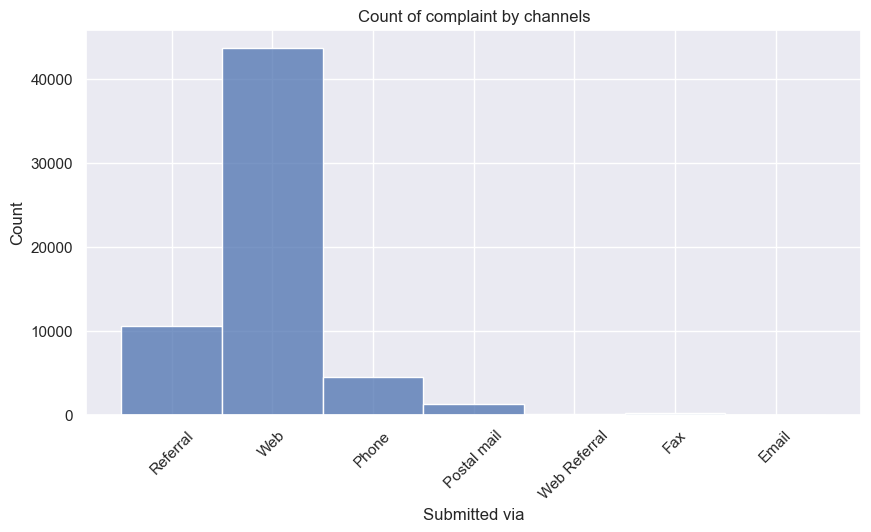

In [49]:
plt.figure(figsize=(10,5))

sns.histplot(data, x='Submitted via')
plt.title('Count of complaint by channels')

plt.xticks(rotation=45)
plt.show()

In [24]:
data_by_year = data.groupby('complaint_year').count()
data_by_year

,Complaint ID,Submitted via,Date submitted,Date received,State,Product,Sub-product,Issue,Company public response,Company response to consumer,Timely response?
complaint_year,,,,,,,,,,,
2017,5299,5299,5299,5299,5299,5299,5299,5299,5299,5299,5299
2018,7790,7790,7790,7790,7790,7790,7790,7790,7790,7790,7790
2019,7022,7022,7022,7022,7022,7022,7022,7022,7022,7022,7022
2020,8864,8864,8864,8864,8864,8864,8864,8864,8864,8864,8864
2021,10947,10947,10947,10947,10947,10947,10947,10947,10947,10947,10947
2022,12831,12831,12831,12831,12831,12831,12831,12831,12831,12831,12831
2023,7581,7581,7581,7581,7581,7581,7581,7581,7581,7581,7581


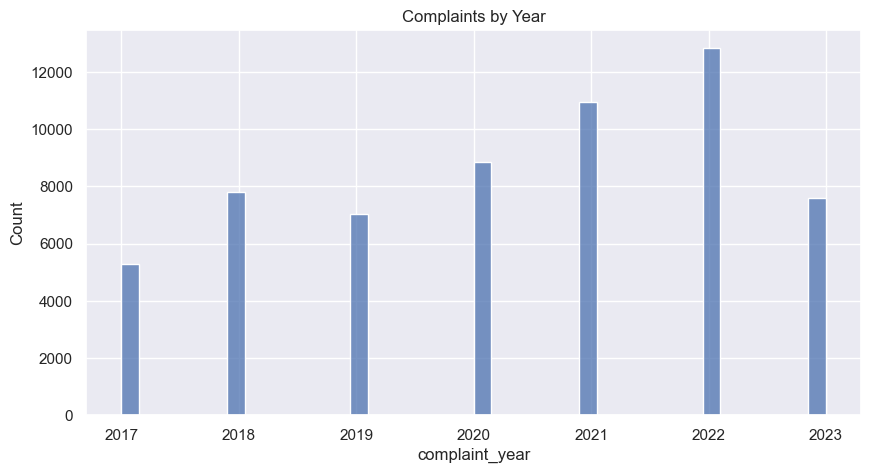

In [78]:
plt.figure(figsize=(10,5))
sns.histplot(data, x='complaint_year')
plt.title('Complaints by Year')
# plt.legend(fontsize='x-large', title_fontsize='40')
plt.show()

In [61]:
# Group by 1ssue
data_by_issue = data.groupby('Issue').count().sort_values('Complaint ID', ascending=False)

In [64]:
data_top10Issues = data_by_issue.head(10)

In [87]:
# Reset index

dt = data_top10Issues.reset_index()
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Issue                         10 non-null     object
 1   Complaint ID                  10 non-null     int64 
 2   Submitted via                 10 non-null     int64 
 3   Date submitted                10 non-null     int64 
 4   Date received                 10 non-null     int64 
 5   State                         10 non-null     int64 
 6   Product                       10 non-null     int64 
 7   Sub-product                   10 non-null     int64 
 8   Company public response       10 non-null     int64 
 9   Company response to consumer  10 non-null     int64 
 10  Timely response?              10 non-null     int64 
 11  complaint_year                10 non-null     int64 
 12  Count                         10 non-null     int64 
dtypes: int64(12), object(1)

In [88]:
dt['Count'] = dt['Complaint ID']
dt

,Issue,Complaint ID,Submitted via,Date submitted,Date received,State,Product,Sub-product,Company public response,Company response to consumer,Timely response?,complaint_year,Count
0,Managing an account,14563,14563,14563,14563,14563,14563,14563,14563,14563,14563,14563,14563
1,Incorrect information on your report,4765,4765,4765,4765,4765,4765,4765,4765,4765,4765,4765,4765
2,Problem with a purchase shown on your statement,4298,4298,4298,4298,4298,4298,4298,4298,4298,4298,4298,4298
3,Closing an account,2847,2847,2847,2847,2847,2847,2847,2847,2847,2847,2847,2847
4,Trouble during payment process,2789,2789,2789,2789,2789,2789,2789,2789,2789,2789,2789,2789
5,Opening an account,2608,2608,2608,2608,2608,2608,2608,2608,2608,2608,2608,2608
6,Problem with a lender or other company chargin...,2364,2364,2364,2364,2364,2364,2364,2364,2364,2364,2364,2364
7,Fraud or scam,1934,1934,1934,1934,1934,1934,1934,1934,1934,1934,1934,1934
8,Struggling to pay mortgage,1883,1883,1883,1883,1883,1883,1883,1883,1883,1883,1883,1883
9,Problem with a credit reporting company's inve...,1798,1798,1798,1798,1798,1798,1798,1798,1798,1798,1798,1798


### Task 3: Complaints by Issues, analysing the top 10 issues

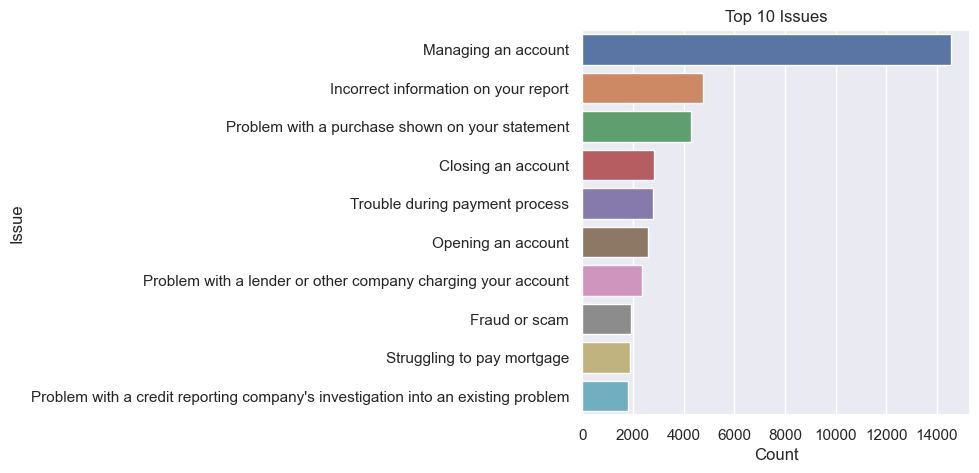

In [141]:
plt.figure(figsize=(5,5))
sns.barplot(dt, y= 'Issue', x='Count')

# sns.set(rc={'figure.figsize':(5,10)})
# plt.xticks(rotation=85)
# sets the limit on the data points to be displayed on y-axis
plt.ylim()
plt.title('Top 10 Issues')
plt.show()

### Task 4: Whether company has reponded or not, percentage of complaints responded to so far from 2017 to 2023

In [105]:
# Creating numeric data column for pie chart

data['Response count'] = data['Timely response?'].apply(lambda x: 1 if x == 'Yes' else 0)

# data[data['Response count'] == 0]

,Complaint ID,Submitted via,Date submitted,Date received,State,Product,Sub-product,Issue,Company public response,Company response to consumer,Timely response?,complaint_year,Response count
58,6189124,Web,2022-11-10,2022-11-10,PA,Checking or savings account,Checking account,Closing an account,Company has responded to the consumer and the ...,Closed with explanation,No,2022,0
60,6862692,Web,2023-04-19,2023-04-19,NY,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Company has responded to the consumer and the ...,Closed with explanation,No,2023,0
68,5223129,Web,2022-02-15,2022-02-15,FL,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Company has responded to the consumer and the ...,Closed with explanation,No,2022,0
70,6458454,Web,2023-01-19,2023-01-19,FL,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Company has responded to the consumer and the ...,Closed with explanation,No,2023,0
75,6064564,Web,2022-10-08,2022-10-08,MO,Vehicle loan or lease,Loan,Incorrect information on your report,Company has responded to the consumer and the ...,Closed with explanation,No,2022,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62292,4765777,Web,2021-09-29,2021-09-29,NV,Credit card or prepaid card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Company has responded to the consumer and the ...,Closed with explanation,No,2021,0
62299,5689649,Web,2022-06-20,2022-06-20,CT,Checking or savings account,Checking account,Managing an account,Company has responded to the consumer and the ...,Closed with monetary relief,No,2022,0
62303,5673378,Web,2022-06-15,2022-06-15,AZ,Credit card or prepaid card,General-purpose credit card or charge card,"Other features, terms, or problems",Company has responded to the consumer and the ...,Closed with explanation,No,2022,0
62314,2683344,Web,2017-09-24,2017-09-24,NY,Credit card or prepaid card,General-purpose credit card or charge card,Getting a credit card,Company has responded to the consumer and the ...,Closed with non-monetary relief,No,2017,0


In [117]:


response_count = data['Response count'].value_counts()
response_count

Response count
1    58117
0     2217
Name: count, dtype: int64

In [118]:
data['Timely response?'].unique()

array(['Yes', 'No'], dtype=object)

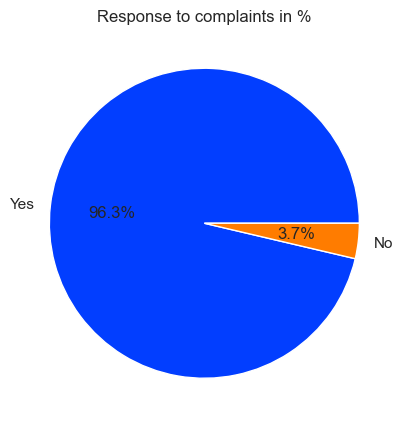

In [128]:

color_palette = sns.color_palette('bright')
plt.pie(response_count, labels = data['Timely response?'].unique(), autopct = '%.1f%%', colors=color_palette)
plt.title('Response to complaints in %')
plt.show()

In [133]:
data['Product'].nunique()

9

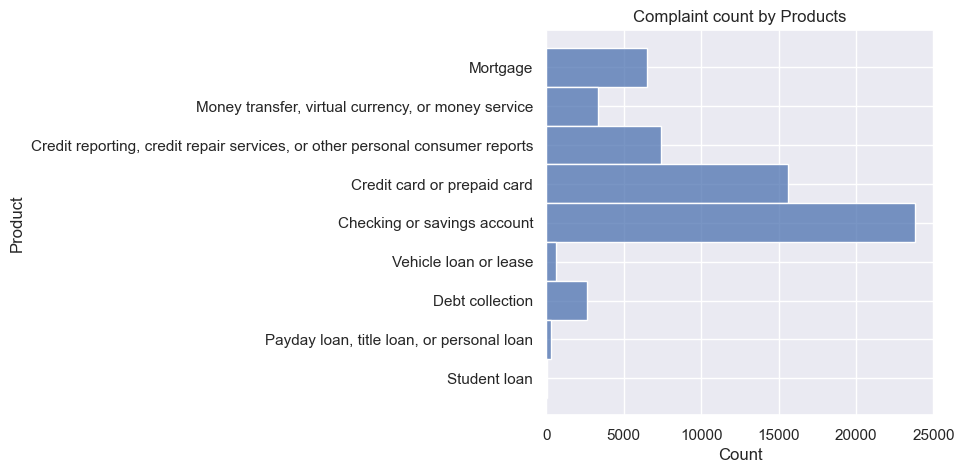

In [151]:
plt.figure(figsize=(5,5))
sns.histplot(data, y ='Product')
plt.title('Complaint count by Products')
plt.show()